In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
import pandas as pd
import mplhep as hep
from iminuit import cost, Minuit
# faster than scipy.stats functions
from numba_stats import truncnorm, truncexpon, norm, expon
from scipy.stats import multivariate_normal as mvnorm
# hep.style.use("CMS")

## Import and process files

In [2]:
N = 100000

    
filenames = [f"100k_cb_30_new_cfd/100k_cb_30_new_cfd_{i}.ecor" for i in range(8)] 


variables=np.zeros((N,5))

dN = 0

for name in filenames:
    print(f"Opening {name}")
    df_temp = pd.read_csv(name, skiprows = lambda x: x % 2566 < 6, delimiter = ";" , names=["t1","A1","t2","A2", "t3", "A3","t4","A4"])
    # df_temp = pd.DataFrame(columns=["t1","A1","t2","A2", "t3", "A3","t4","A4"])
    
    deriv = df_temp.diff()

    df_temp["d1"] = deriv["A1"]/deriv["t1"]
    df_temp["d2"] = deriv["A2"]/deriv["t2"]
    df_temp["d3"] = deriv["A3"]/deriv["t3"]
    df_temp["d4"] = deriv["A4"]/deriv["t4"]
    
    print("Derivatives computed")
    
    
    n = int(np.ceil(len(df_temp)/2560))
    variables_temp=np.zeros((n,5))
    
    for i in range(n):
        
        df0 = df_temp[2560*i:2560*(i+1)]
        
        variables_temp[i,0] = df0.at[df0["d2"].idxmin(),"t2"] - df0.at[df0["d1"].idxmin(),"t1"]
        
        variables_temp[i,1] = -min(df0["A3"])
        variables_temp[i,2] = -min(df0["A4"])
        
        df1=df0.to_numpy()
        mins = np.argmin(df1,axis=0)
        IDminA3 = mins[5]
        IDminA4 = mins[7]
        
        offsetA3 = np.mean(df1[IDminA3-200:IDminA3-150,5])
        offsetA4 = np.mean(df1[IDminA4-200:IDminA4-150,7])
        
        start_int = -100
        end_int = 150
        
        intA3 = -np.sum(df1[IDminA3+start_int:IDminA3+end_int,5]-offsetA3)*0.5
        intA4 = -np.sum(df1[IDminA4+start_int:IDminA4+end_int,7]-offsetA4)*0.5
        
        variables_temp[i,3] = intA3
        variables_temp[i,4] = intA4
        
        k = i
    
    if dN+n>=N:
    
        variables[dN:N]=variables_temp[0:N-dN]
        
    else :
        variables[dN:dN+n]=variables_temp
    
    dN+=n
    
    if dN>=N:
        print(f"All {N} points computed")
        break
        
    print("Computed all variables") 
    # df = pd.concat([df,df_temp])

#df.to_csv(r'TL2023.csv', index=None)
print("All files opened")

Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_0.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_1.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_2.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_3.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_4.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_5.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_6.ecor
Derivatives computed


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed all variables
Opening 100k_cb_30_new_cfd/100k_cb_30_new_cfd_7.ecor
Derivatives computed
All 100000 points computed
All files opened


/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/local/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Oscillo plots

/tmp/ipykernel_289301/2445127327.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


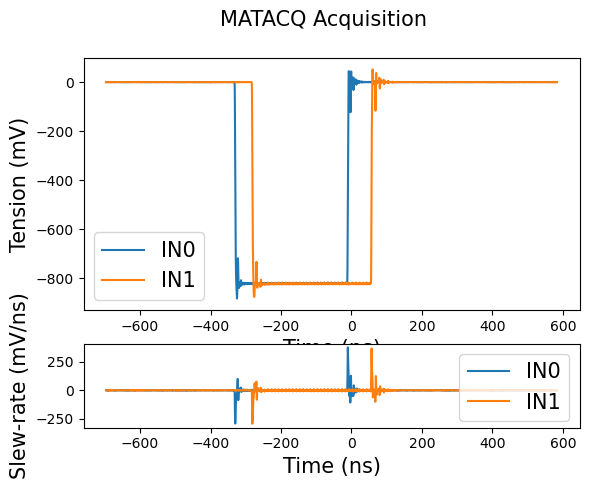

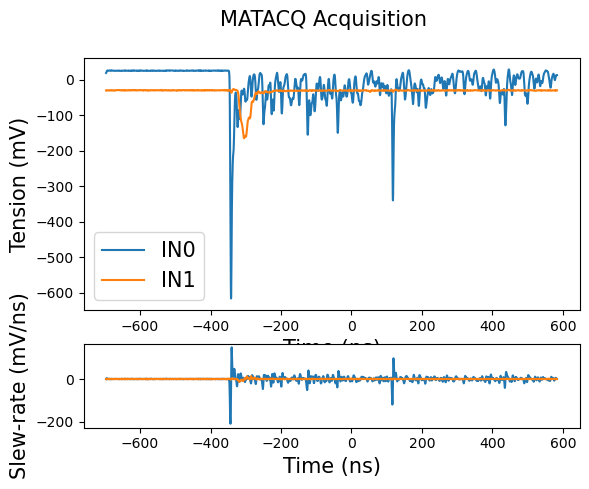

In [3]:
n_plot = 3
def plot_debug(n_plot):
    
    fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle(
       "MATACQ Acquisition",
       fontsize=15,
    )
    
    
    ax1.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),0],df_temp.iloc[2560*n_plot:2560*(n_plot+1),1],label='IN0')
    ax1.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),2],df_temp.iloc[2560*n_plot:2560*(n_plot+1),3],label='IN1')
    
    ax1.set_xlabel("Time (ns)", fontsize=15)
    ax1.set_ylabel("Tension (mV)", fontsize=15)
    # ax1.set_ylim(0, 25)
    
    ax1.legend(fontsize=15)
    
    
    
    ax2.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),0],df_temp.iloc[2560*n_plot:2560*(n_plot+1),8],label='IN0')
    ax2.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),2],df_temp.iloc[2560*n_plot:2560*(n_plot+1),9],label='IN1')
    
    ax2.set_xlabel("Time (ns)", fontsize=15)
    ax2.set_ylabel("Slew-rate (mV/ns)", fontsize=15)
    # ax1.set_ylim(0, 25)
    
    ax2.legend(fontsize=15)
    
    # fig.tight_layout()
    fig.show()
    
    
def plot_debug2(n_plot):
    
    fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle(
       "MATACQ Acquisition",
       fontsize=15,
    )
    
    
    ax1.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),4],df_temp.iloc[2560*n_plot:2560*(n_plot+1),5],label='IN0')
    ax1.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),6],df_temp.iloc[2560*n_plot:2560*(n_plot+1),7],label='IN1')
    
    ax1.set_xlabel("Time (ns)", fontsize=15)
    ax1.set_ylabel("Tension (mV)", fontsize=15)
    # ax1.set_ylim(0, 25)
    
    ax1.legend(fontsize=15)   
    
    ax2.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),0],df_temp.iloc[2560*n_plot:2560*(n_plot+1),10],label='IN0')
    ax2.plot(df_temp.iloc[2560*n_plot:2560*(n_plot+1),2],df_temp.iloc[2560*n_plot:2560*(n_plot+1),11],label='IN1')
    
    ax2.set_xlabel("Time (ns)", fontsize=15)
    ax2.set_ylabel("Slew-rate (mV/ns)", fontsize=15)
    # ax1.set_ylim(0, 25)
    
#     ax2.legend(fontsize=15)
    

plot_debug(n_plot)
#
plot_debug2(n_plot)
    

## Delai distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


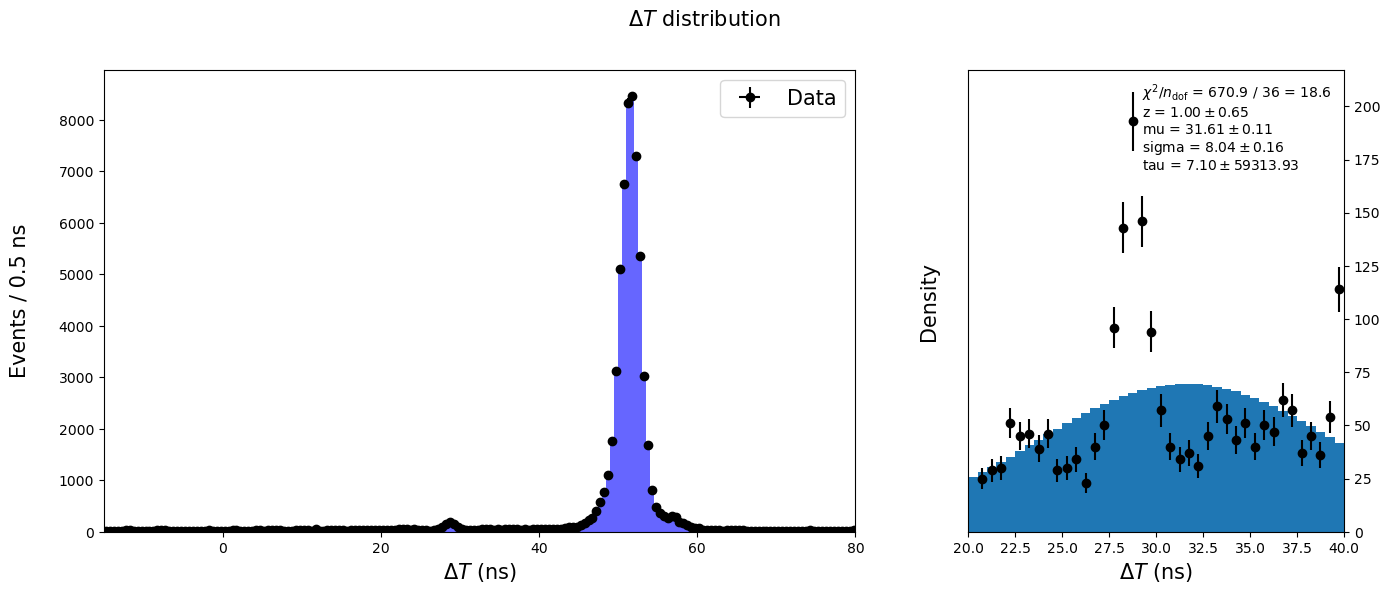

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6), gridspec_kw={'width_ratios': [2, 1]})

diff = variables[:,0]

# # Plot the histogram.

tmin, tmax = -15,80
nbins = int((tmax-tmin)/0.5)


data_hist = np.histogram(diff, bins=nbins, range=(tmin, tmax))

ax1.hist(diff, range=[tmin,tmax], bins=nbins, alpha=0.6, color='b')

hist, bins = data_hist  # hist=frequency ; bins=Mass values
width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

xerrs = [width * 0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)


# Measured data
ax1.errorbar(
   center,
   hist,
   xerr=xerrs,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)

  
# # Plot the PDF.


fig.suptitle(
   "$\Delta T$ distribution",
   fontsize=15,
)
ax1.set_xlabel("$\Delta T$ (ns)", fontsize=15)
ax1.set_ylabel("Events / 0.5 ns\n", fontsize=15)
# ax1.set_ylim(0, 25)
ax1.set_xlim(tmin, tmax)
ax1.legend(fontsize=15)



#SECOND PLOT ZOOOOOOOM


data = diff[np.where((diff > 20) & (diff < 50))]


  
# # Plot the histogram.

xmin, xmax = 20,40
nbins = 40


hist, bins = np.histogram(data, bins=nbins, range=(xmin, xmax))
# the tuple `M_hist` that this function gives is so common in python that it is recognized by mplhep plotting functions


xr = (xmin, xmax)

def cdf(xe, z, mu, sigma, tau):
    return (z * truncnorm.cdf(xe, *xr, mu, sigma) +
            (1-z) * truncexpon.cdf(xe, *xr, 0, tau))



c = cost.BinnedNLL(hist, bins, cdf)
m = Minuit(c, z=0.4, mu=30, sigma=2, tau=1)
m.limits["z"] = (0, 1)
m.limits["sigma"] = (0, None)
m.limits["tau"] = (0, None)
m.migrad()


# ax2.hist(diff[np.where(diff > 20)], bins=nbins, range=[xmin, xmax], density=True, alpha=0.6, color='b')
  
# # Plot the PDF.

m.visualize()
  
# ax2.plot(x, p, 'k', linewidth=2)
ax2.set_xlabel("$\Delta T$ (ns)", fontsize=15)
ax2.set_ylabel("Density\n", fontsize=15)
# ax1.set_ylim(0, 25)
ax2.set_xlim(xmin, xmax)
ax2.yaxis.tick_right()

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.2f} \\pm {e:.2f}$")

ax2.legend(title="\n".join(fit_info), frameon=False)

## Amplitude distribution

(0.0, 1000.0)

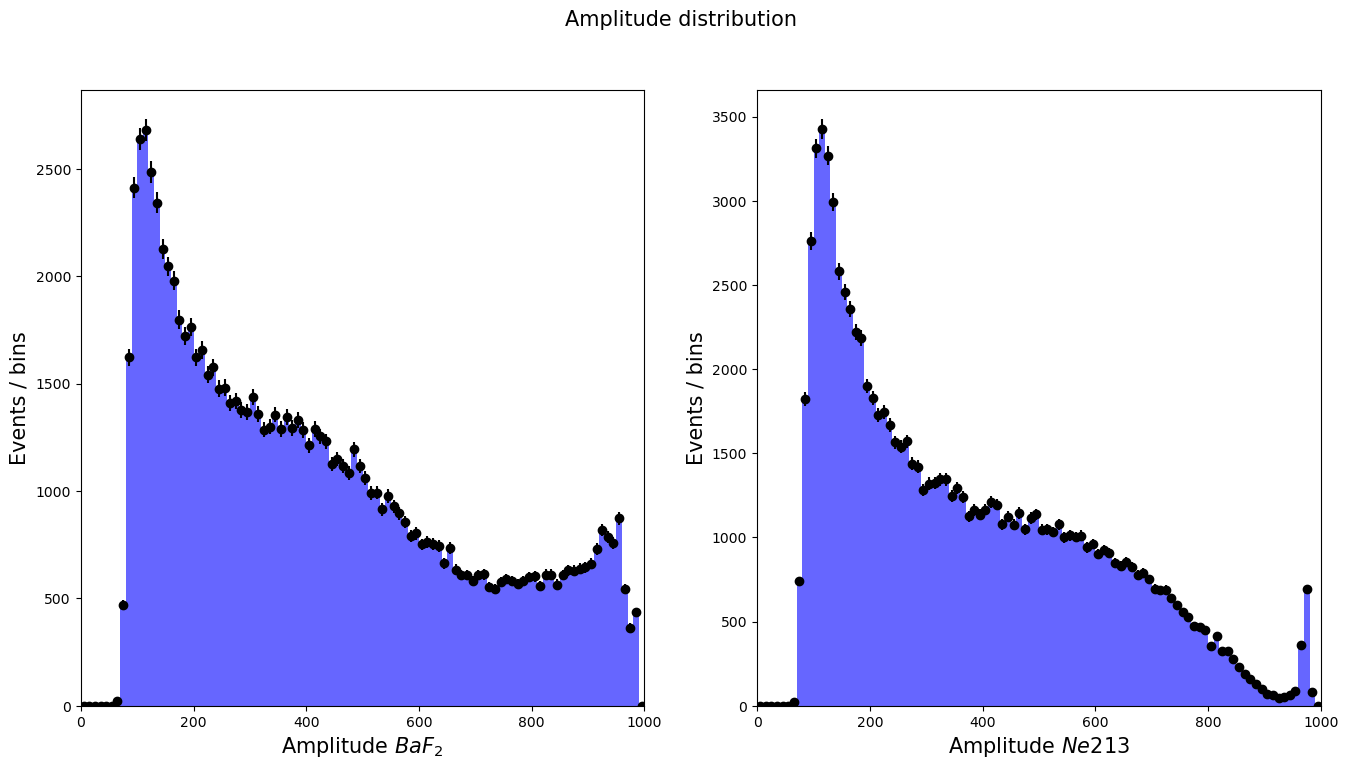

In [5]:
#####################
#     AMPLITUDE
#####################

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8), gridspec_kw={'width_ratios': [1, 1]})

fig.suptitle(
   "Amplitude distribution",
   fontsize=15,
)
Amin, Amax = 0,1000
# nbins = int((xmax-xmin)/0.5)
nbins = 100

data_hist = np.histogram(variables[:,1], bins=nbins, range=(Amin, Amax))

ax1.hist(variables[:,1], range=[Amin,Amax], bins=nbins, alpha=0.6, color='b')

hist, bins = data_hist  # hist=frequency ; bins=Mass values
width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

xerrs = [width * 0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)


# Measured data
ax1.errorbar(
   center,
   hist,
   xerr=None,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)

  

ax1.set_xlabel("Amplitude $BaF_2$", fontsize=15)
ax1.set_ylabel("Events / bins", fontsize=15)
# ax1.set_ylim(0, 25)
ax1.set_xlim(Amin, Amax)
# ax1.legend(fontsize=15)


Amin, Amax = 0,1000
# nbins = int((xmax-xmin)/0.5)
nbins = 100

data_hist = np.histogram(variables[:,2], bins=nbins, range=(Amin, Amax))

ax2.hist(variables[:,2], range=[Amin,Amax], bins=nbins, alpha=0.6, color='b')

hist, bins = data_hist  # hist=frequency ; bins=Mass values
width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

xerrs = [width * 0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)


# Measured data
ax2.errorbar(
   center,
   hist,
   xerr=None,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)
ax2.set_xlabel("Amplitude $Ne213$", fontsize=15)
ax2.set_ylabel("Events / bins", fontsize=15)
# ax1.set_ylim(0, 25)
ax2.set_xlim(Amin, Amax)
# ax2.legend(fontsize=15)


## Integral distribution

(5000.0, 30000.0)

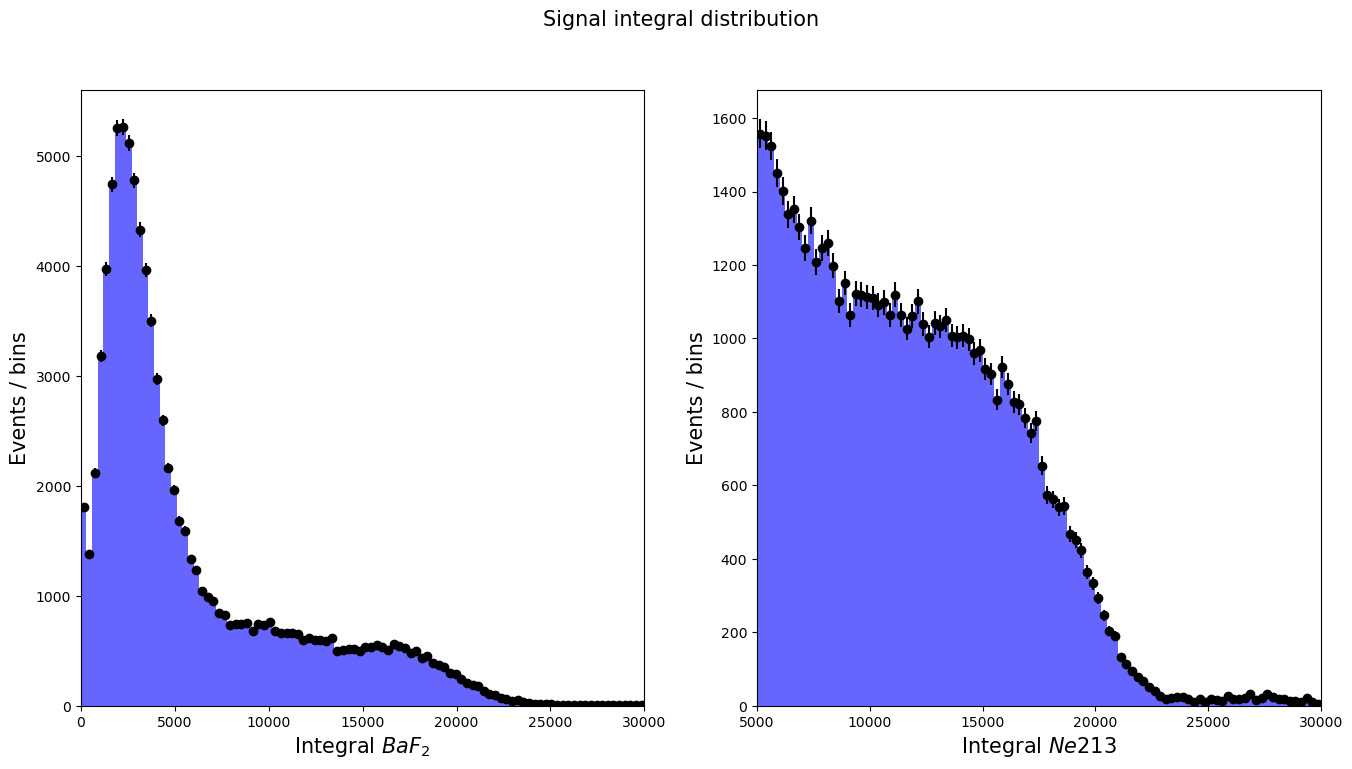

In [21]:
#########################
#       INTEGRAL
#########################

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8), gridspec_kw={'width_ratios': [1, 1]})

fig.suptitle(
   "Signal integral distribution",
   fontsize=15,
)
Imin, Imax = 0,30000
# nbins = int((xmax-xmin)/0.5)
nbins = 100

data_hist = np.histogram(variables[:,3], bins=nbins, range=(Imin, Imax))

ax1.hist(variables[:,3], range=[Imin,Imax], bins=nbins, alpha=0.6, color='b')

hist, bins = data_hist  # hist=frequency ; bins=Mass values
width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

xerrs = [width * 0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)


# Measured data
ax1.errorbar(
   center,
   hist,
   xerr=None,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)

  

ax1.set_xlabel("Integral $BaF_2$", fontsize=15)
ax1.set_ylabel("Events / bins", fontsize=15)
# ax1.set_ylim(0, 25)
ax1.set_xlim(Imin, Imax)
# ax1.legend(fontsize=15)


Imin, Imax = 5000,30000
# nbins = int((xmax-xmin)/0.5)
nbins = 100

hist, bins = np.histogram(variables[:,4], bins=nbins, range=(Imin, Imax))

ax2.hist(variables[:,4], range=[Imin,Imax], bins=nbins, alpha=0.6, color='b')


width = bins[1] - bins[0]

center = (bins[:-1] + bins[1:]) / 2

xerrs = [width * 0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)


# Measured data
ax2.errorbar(
   center,
   hist,
   xerr=None,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)
ax2.set_xlabel("Integral $Ne213$", fontsize=15)
ax2.set_ylabel("Events / bins", fontsize=15)
# ax1.set_ylim(0, 25)
ax2.set_xlim(Imin, Imax)
# ax2.legend(fontsize=15)




## Fitting iminuit

In [27]:
xr = (15500, 30000)
nbins = 100

def cdf(xe, z, mu, sigma, tau):
    return (z * truncnorm.cdf(xe, *xr, mu, sigma) +
            (1-z) * truncexpon.cdf(xe, *xr, 0, tau))

var_trunc = variables[variables[:,2]<950,:]

var_trunc = var_trunc[var_trunc[:,2]>650,:]

hist, bins = np.histogram(var_trunc[:,4], bins=nbins, range=(xr[0], xr[1]))

c = cost.BinnedNLL(hist, bins, cdf)
m = Minuit(c, z=0.4, mu=20000, sigma=4000, tau=5000)
m.limits["z"] = (0, 1)
m.limits["sigma"] = (1000, None)
m.limits["tau"] = (1000, None)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 130.4 (χ²/ndof = 1.4)      │              Nfcn = 300              │
│ EDM = 1.57e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.917   │   0.029   │            │            │    0    │    1    │       │
│ 1 │ mu    │  17.53e3  │  0.08e3   │            │            │         │         │       │
│ 2 │ sigma │  2.11e3   │  0.05e3   │            │            │  1000   │         │       │
│ 3 │ tau   │  3.00e3   │  0.35e3   │            │            │  1000   │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │        z       mu    sigma      tau │
├───────┼─────────────────────────────────────┤
│     z │  0.00086  -2.0603   1.2648   8.5658 │
│    mu │  -2.0603 6.74e+03   -3.9e3    -22e3 │
│ sigma │   1.2648   -3.9e3 2.88e+03   11.0e3 │
│   tau │   8.5658    -22e3   11.0e3 1.21e+05 │
└───────┴─────────────────────────────────────┘

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


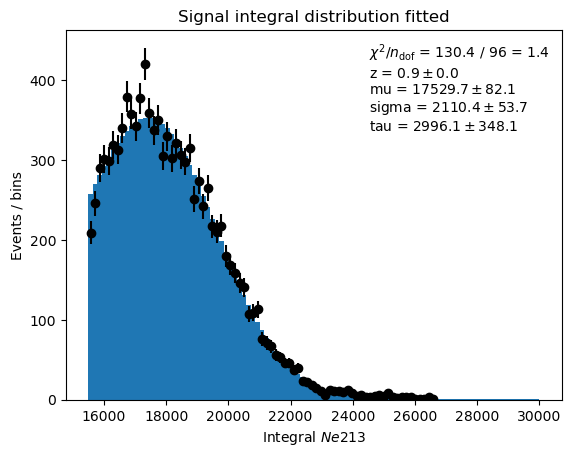

In [28]:
m.visualize()
plt.title("Signal integral distribution fitted")

# draw data and fitted line
#plt.errorbar(data_x, data_y, data_yerr, fmt="ok", label="data")
#plt.plot(data_x, line(data_x, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.1f} \\pm {e:.1f}$")

plt.legend(title="\n".join(fit_info), frameon=False)
plt.xlabel("Integral $Ne213$")
plt.ylabel("Events / bins");

In [31]:
def density(x, s, b, mu, sigma, tau):
    return s + b, (s * truncnorm.pdf(x, *xr, mu, sigma) +
        b * truncexpon.pdf(x, *xr, 0, tau))

c = cost.ExtendedUnbinnedNLL(var_trunc[(var_trunc[:,4]>xr[0])&(var_trunc[:,4]<xr[1]),4], density)

m = Minuit(c, s=20000, b=20000, mu=20000, sigma=2500, tau=3000)
m.limits["b","tau"] = (0, None)
m.migrad()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.047e+04                  │              Nfcn = 436              │
│ EDM = 2.41e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │  10.02e3  │  0.33e3   │            │            │         │         │       │
│ 1 │ b     │  0.91e3   │  0.32e3   │            │            │    0    │         │       │
│ 2 │ mu    │  17.53e3  │  0.08e3   │            │            │         │         │       │
│ 3 │ sigma │  2.11e3   │  0.05e3   │            │            │         │         │       │
│ 4 │ tau   │  2.99e3   │  0.34e3   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────┐
│       │        s        b       mu    sigma      tau │
├───────┼──────────────────────────────────────────────┤
│     s │ 1.12e+05  -0.10e6    -22e3   13.7e3   0.09e6 │
│     b │  -0.10e6 1.03e+05     23e3  -13.7e3  -0.09e6 │
│    mu │    -22e3     23e3 6.75e+03   -3.9e3    -21e3 │
│ sigma │   13.7e3  -13.7e3   -3.9e3 2.86e+03   10.7e3 │
│   tau │   0.09e6  -0.09e6    -21e3   10.7e3 1.18e+05 │
└───────┴──────────────────────────────────────────────┘

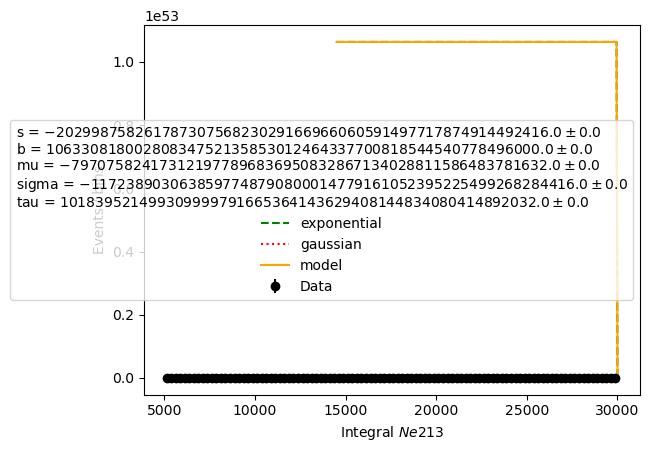

In [23]:
x = np.linspace(xr[0],xr[1],300)
s,b,mu,sigma,tau = m.values


def gauss(x, s, mu, sigma):
    return s * truncnorm.pdf(x, *xr, mu, sigma) *(xr[1]-xr[0])/nbins
            
def exp(x, b, tau):
    return b * truncexpon.pdf(x, *xr, 0, tau)*(xr[1]-xr[0])/nbins
        
def sum(x, s, b, mu, sigma, tau):
    return (s * truncnorm.pdf(x, *xr, mu, sigma) +
        b * truncexpon.pdf(x, *xr, 0, tau))*(xr[1]-xr[0])/nbins
        
plt.plot(x,exp(x,b,tau),'g--',label="exponential")
plt.plot(x,gauss(x, s, mu, sigma),'r:',label='gaussian')
plt.plot(x,sum(x, *m.values),'orange',label='model')
center = (bins[:-1] + bins[1:]) / 2
yerrs = np.sqrt(hist)
plt.errorbar(
   center,
   hist,
   xerr=None,
   yerr=yerrs,
   linestyle="None",
   color="black",
   marker="o",
   label="Data"
)
fit_info = []
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.1f} \\pm {e:.1f}$")

plt.legend(title="\n".join(fit_info), frameon=True)
plt.xlabel("Integral $Ne213$")
plt.ylabel("Events / bins");

## 2D plots

Text(0, 0.5, 'Integral $Ne213$')

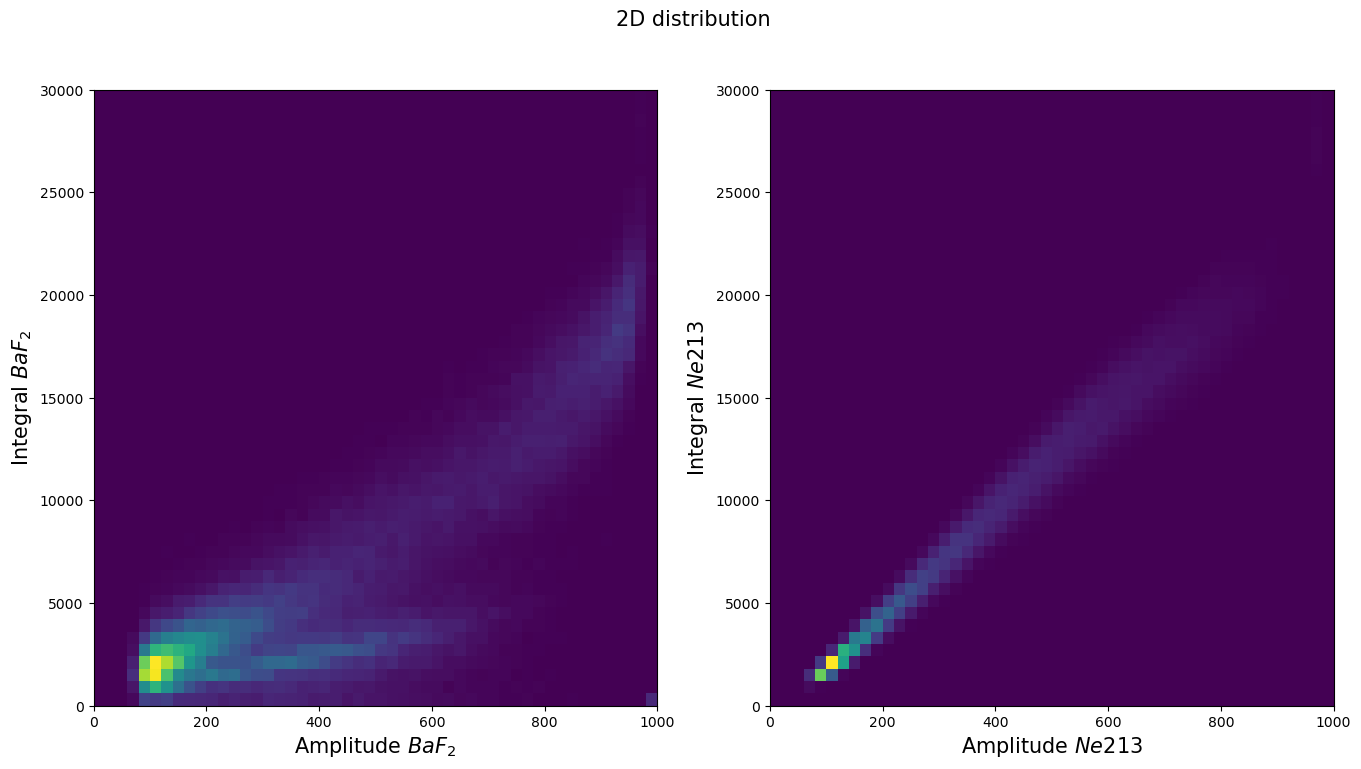

In [11]:
###################
#   2D PLOT 
###################
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8), gridspec_kw={'width_ratios': [1, 1]})

fig.suptitle(
   "2D distribution",
   fontsize=15,
)
ax1.hist2d(variables[:,1], variables[:,3], bins=50, range=[[Amin,Amax],[Imin,Imax]])
ax1.set_xlabel("Amplitude $BaF_2$", fontsize=15)
ax1.set_ylabel("Integral $BaF_2$", fontsize=15)
ax2.hist2d(variables[:,2], variables[:,4], bins=50,  range=[[Amin,Amax],[Imin,Imax]])
ax2.set_xlabel("Amplitude $Ne213$", fontsize=15)
ax2.set_ylabel("Integral $Ne213$", fontsize=15)

In [12]:
tau

1.203406094536071e+27

In [13]:
m.ndof

inf